<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/2_4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import datasets

data, target = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)
data = data.astype({"age": int, "sex": int, "bp": int})
print(data)

     age  sex   bmi   bp     s1     s2    s3    s4      s5     s6
0     59    2  32.1  101  157.0   93.2  38.0  4.00  4.8598   87.0
1     48    1  21.6   87  183.0  103.2  70.0  3.00  3.8918   69.0
2     72    2  30.5   93  156.0   93.6  41.0  4.00  4.6728   85.0
3     24    1  25.3   84  198.0  131.4  40.0  5.00  4.8903   89.0
4     50    1  23.0  101  192.0  125.4  52.0  4.00  4.2905   80.0
..   ...  ...   ...  ...    ...    ...   ...   ...     ...    ...
437   60    2  28.2  112  185.0  113.8  42.0  4.00  4.9836   93.0
438   47    2  24.9   75  225.0  166.0  42.0  5.00  4.4427  102.0
439   60    2  24.9   99  162.0  106.6  43.0  3.77  4.1271   95.0
440   36    1  30.0   95  201.0  125.2  42.0  4.79  5.1299   85.0
441   36    1  19.6   71  250.0  133.2  97.0  3.00  4.5951   92.0

[442 rows x 10 columns]


**2.4.1 MLE for Random Samples** - We can find an estimation of parameters of a probability distribution by maximizing a likelihood function of those parameters. This is called Maximum Likelihood Estimation (MLE). When we find the value that maximizes the likelihood function in the sample space is our estimate value. We can find the sample's MLE with ̂μ=̂X and ̂σ=∑(Xᵢ-̂X)^2 / n

**2.4.2 Linear Regression** - Since Linear Regression is ̂β=argmin∑(y-̂yᵢ)^2, we use the Gradient Descent MLE approach to solve for simple linear regression here where m = -2/n∑xᵢ(yᵢ-mxᵢ+b) and b = -2/n∑(yᵢ-mxᵢ+b) from i=1 to n. Where β_0 = b and βᵢ = m for i=1 to n (the end of the sample space).

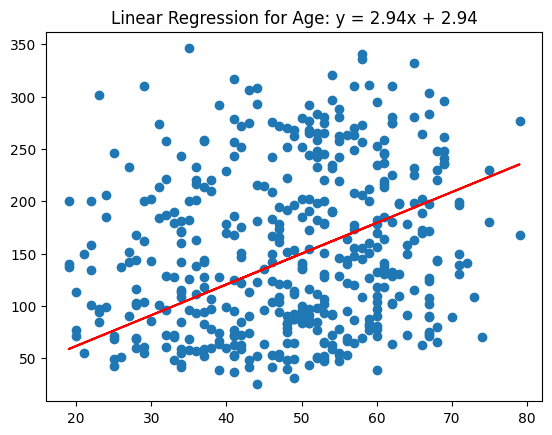

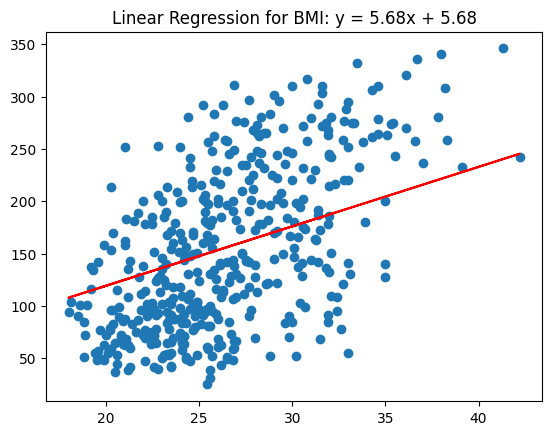

In [39]:
mean = data.mean()
deviation = data.var()

def grad_desc(X, Y, m, b):
  n = len(X)

  summ = 0
  for x, y in zip(X, Y):
    summ += x*(y - (m*x+b))
  return -2/n * summ

def grad_desc_learn(X, Y, m, b, rate=0.01):
  return [
      m - (rate * grad_desc(X, Y, m, b)),
      b - (rate * grad_desc(X, Y, m, b))
  ]

def grad_desc_lr(X, Y, n=1000, rate=0.01):
  m = 0
  b = 0
  for i in range(n):
    [m, b] = grad_desc_learn(X, Y, m, b, rate)
  return [m,b]

slope, intercept = grad_desc_lr(data["age"], target, 10000, 0.0001)
est = slope * data["age"] + intercept

plt.scatter(data["age"], target.values)
plt.plot(data["age"], est, color="r")
plt.title("Linear Regression for Age: y = " + str(np.round(slope, 2)) + "x + " + str(np.round(intercept, 2)))
plt.show()

slope, intercept = grad_desc_lr(data["bmi"], target, 1000, 0.001)
est = slope * data["bmi"] + intercept

plt.scatter(data["bmi"], target.values)
plt.plot(data["bmi"], est, color="r")
plt.title("Linear Regression for BMI: y = " + str(np.round(slope, 2)) + "x + " + str(np.round(intercept, 2)))
plt.show()